In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

![](./imgs/task1.png)

![](./imgs/task1_data.png)

In [2]:
df1 = pd.DataFrame({'Медианная зп': [47.7,49.5,81.3,49.2,67.7,56.6,54.7,78.0,70.3,83.0]}, index= range(1,11))
df1.index.name = 'Номер'
df1

,Медианная зп
Номер,
1,47.7
2,49.5
3,81.3
4,49.2
5,67.7
6,56.6
7,54.7
8,78.0
9,70.3


![](./imgs/task11.png)

In [3]:
print("Вариационный ряд:")
df1.sort_values('Медианная зп', ascending = False)

Вариационный ряд:


,Медианная зп
Номер,
10,83.0
3,81.3
8,78.0
9,70.3
5,67.7
6,56.6
7,54.7
2,49.5
4,49.2


ЭФР:


<Axes: >

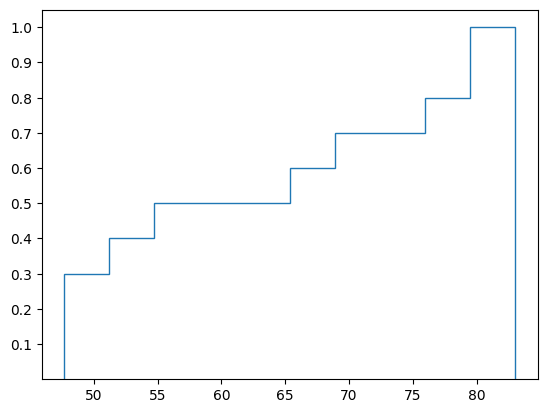

In [4]:
print("ЭФР:")
lst = df1['Медианная зп']
fig, ax1 = plt.subplots()
ax1.hist(lst, histtype='step', cumulative=True, bins=len(lst))
ax1.set_yticks([i for i in range(1,len(lst)+1)])
ax1.set_yticklabels([i/10 for i in range(1,len(lst)+1)])
ax1

array([[<Axes: title={'center': 'Медианная зп'}>]], dtype=object)

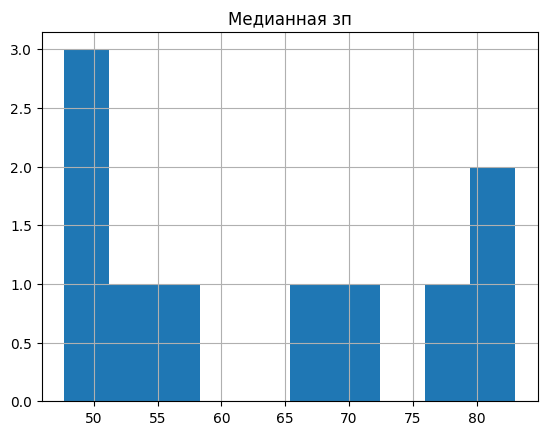

In [5]:
df1.hist()

In [6]:
pd.DataFrame({"Среднее выборочное": df1.mean(), "Дисперсия (несмещенная)": df1.var(), "Дисперсия (смещенная)": df1.var() * (len(df1)-1)/len(df1)})

,Среднее выборочное,Дисперсия (несмещенная),Дисперсия (смещенная)
Медианная зп,63.8,193.944444,174.55


In [7]:
pd.DataFrame({"Медиана": df1.median(), "Квантиль 1/4 (первый квартиль)": df1.quantile(.25, interpolation="nearest"), "Квантиль 3/4 (третий квартиль)": df1.quantile(.75, interpolation='nearest')})

,Медиана,Квантиль 1/4 (первый квартиль),Квантиль 3/4 (третий квартиль)
Медианная зп,62.15,49.5,78.0


In [8]:
df1log = df1.apply(np.log)
pd.DataFrame({"Среднее значение логарифма": df1log.mean(), "Дисперсия логарифма (смещенная)": df1log.var() * (len(df1)-1)/len(df1)})

,Среднее значение логарифма,Дисперсия логарифма (смещенная)
Медианная зп,4.134222,0.043118


![](./imgs/task12.png)

Напишем уравнения метода моментов, использую формулы матожидания и дисперсии логнормального распределения:

$$\begin{cases}
    E[X]=e^{\hat{a}+\frac{\hat{\sigma}^2}{2}}=\overline{x}\\
    D[X]=e^{2\hat{a}+\hat{\sigma}^2}\left(e^{\hat{\sigma}^2}-1\right)=s^2
\end{cases}$$

Из первого уравнения:
$\hat{a}+\frac{\hat{\sigma}^2}{2}=\ln{\overline{x}}\Rightarrow \hat{a}=\ln{\overline{x}}-\frac{\hat{\sigma}^2}{2}$ \
Откуда выразим: $2\hat{a}+\hat{\sigma}^2=2\left(\ln{\overline{x}}-\frac{\hat{\sigma}^2}{2}\right)+\hat{\sigma}^2=2\ln{\overline{x}}$

Подставим полученное выражение во второе уравнение: \
$e^{2\ln{\hat{x}}}\left(e^{\hat{\sigma}^2}-1\right) = s^2 \Rightarrow \overline{x}^2\left(e^{\hat{\sigma}^2}-1\right)=s^2 \Rightarrow
e^{\hat{\sigma}^2}-1=\frac{s^2}{\overline{x}^2}\Rightarrow \hat{\sigma}^2=\ln{\left(1+\frac{s^2}{\overline{x}^2}\right)}$

Теперь подставим в ранее полученное выражение и получим оценку для a: \
$\hat{a}=\ln{\overline{x}}-\frac{1}{2}\ln{\left(1+\frac{s^2}{\overline{x}^2}\right)}$

Теперь посчитаем значения оценок для нашего случая: \
$\hat{\sigma}^2\approx\ln{\left(1+\frac{193.944444}{4070.44}\right)}\approx0,0465$ \
$\hat{a}\approx\ln{63.8}-\frac{1}{2}\cdot0,0465\approx4,133$ \
Полученные оценки достаточно близки к вычисленным выше среднему выборочному и дисперсии логарифмированной выборки

Найдем смещение оценок: $E[\hat{\sigma}^2]=E\left[\ln{\left(1+\frac{s^2}{\overline{x}^2}\right)}\right]$
Разложим логарифм по Тейлору: \
$\ln{\left(1+\frac{s^2}{\overline{x}^2}\right)}=\frac{s^2}{\overline{x}^2}-\frac{s^4}{2\overline{x}^4}+o\left(\frac{s^4}{\overline{x}^4}\right)$ \
 По закону больших чисел $s^2$ будет сколь угодно малой при увеличении $n$, поэтому асимптотически: \
 $E[\hat{\sigma}^2]=E\left[\frac{s^2}{\overline{x}^2}\right]=E\left[\frac{e^{2a+\sigma^2}\left(e^{\sigma^2}-1\right)}{\left(e^{a+\frac{\sigma^2}{2}}\right)^2}\right]=E\left[e^{\sigma^2}-1\right]$ \
Что по Тейлору равняется: $E[\sigma^2]=\sigma^2$ \
То есть мы получили что оценка параметра $\hat{\sigma}^2$ является асимптотически несмещенной



Для $\hat{a}$: \
$E[\hat{a}]=E\left[\ln{\overline{x}}-\frac{1}{2}\hat{\sigma}^2\right]$
Использую ЗБЧ и асимптотический переход приходим к: \
$E[\hat{a}]=\ln{E[\overline{x}]}-\frac{1}{2}E[\hat{\sigma}^2]=\ln{\left(e^{a+\frac{\sigma^2}{2}}\right)}-\frac{\sigma^2}{2}=a$ \
То есть оценка $a$ тоже является асимптотически несмещенной 

Кроме того найденные оценки являются состоятельными и асимптотически нормальными (что можно доказать через ЗБЧ, ЦПТ и свойства метода моментов)

![](./imgs/task13.png)

Да, найденная оценка регулярна, найдем информацию Фишера 

Выпишем плотность логнормального распределения:
$$f(x, a, \sigma^2)=\frac{1}{x\sigma\sqrt{2\pi}}\cdot e^{-\frac{(\ln{x}-a)^2}{2\sigma^2}}$$
Её логарифм: 
$$\ln{f(x, a, \sigma^2)}=-\ln{x}-\ln{\sigma}-\frac{1}{2}\ln{2\pi}-\frac{(\ln{x}-a)^2}{2\sigma^2}$$

Найдем первую и вторую производную: 
$$\frac{\partial f}{\partial a}=\frac{\ln{x}-a}{\sigma^2}$$
$$\frac{\partial^2 f}{\partial a^2}=-\frac{1}{\sigma^2}$$

Теперь вычислим информацию Фишера:
$$I(a)=-E\left[\frac{\partial^2 f}{\partial a^2}\right]=-E\left[-\frac{1}{\sigma^2}\right]=\frac{1}{\sigma^2}$$

![](./imgs/task14.png)

Нет, оценка не является R-эффективной

$MSE(\hat{a})=E\left[(\hat{a}-a)^2\right]=D[\hat{a}]+(B[\hat{a}])^2$
Где $D[\hat{a}]$ асимптотически можно найти по формуле: $D[\hat{a}]\approx\frac{\sigma^2}{n}$ \
$B$ - смещение оценки, оно асимптотически сильно меньше $D[\hat{a}]$, поэтому пренебрежем им. \
Итого: $MSE(\hat{a})\approx \frac{\sigma^2}{n}$

![](./imgs/task15.png)


Нет, она не является достаточной, возможно по методу наибольшего правдоподобия вышла бы достаточная оценка

![](./imgs/task16.png)

Воспользуемся формулой доверительного интервала для оценки нормальной распределенной величины при неизвестной дисперсии:
$$a\in\left[\overline{\ln{x}}-t_{\frac{1+\gamma}{2}, \space n-1} \cdot \frac{s}{\sqrt{n}}, \space \overline{\ln{x}}+t_{\frac{1+\gamma}{2}, \space n-1} \cdot \frac{s}{\sqrt{n}}\right]$$ 
Где $s=\frac{\sum{\left(\ln{x}-\overline{\ln{x}}\right)^2}}{n-1}$

Найдем значения распределения Стьюдента: 
$$t_{\frac{1-\gamma}{2}, \space n-1}=t_{0.975, 9}\approx2.685$$
Тогда используя значения рассчитанные в пункте 1: \
$\overline{\ln{x}}=4.134222, s=0.043118$ \
Откуда:
$$a\in\left[4.134222-2.685 \cdot \frac{0.043118}{3.1623}, \space 4.134222+2.685 \cdot \frac{0.043118}{3.1623}\right]$$ 
$$a\in\left[4,0976, \space 4,1708\right]$$ 

![](./imgs/task2.png)

![](./imgs/task21.png)

Найдем мат. ожидание модуля распределения: $$E[|x|]=\int^\infty_{-\infty}{\frac{|x|\beta}{2}e^{-\beta |x|}dx}=\int^\infty_{0}{\frac{|x|\beta}{2}e^{-\beta x}dx} + \int^0_{-\infty}{\frac{|x|\beta}{2}e^{\beta x}dx} = \left(-\frac{e^{-\beta x} (\beta x + 1)}{2 \beta} \right)^\infty_0 + \left(-\frac{e^{\beta x} (\beta x - 1)}{2 \beta} \right)^0_{-\infty}=$$

$$=0-\left(-\frac{1\cdot1}{2\beta}\right)-\frac{1\cdot(-1)}{2\beta}-0=\frac{1}{\beta}$$ 
А так как статистика $\overline{|x|}\longrightarrow E[|x|]=\frac{1}{\beta}=\theta$, то она несмещена 

![](./imgs/task22.png)

По теореме УЗБЧ $\hat{\theta_n}\rightarrow \theta $ (почти наверное) $\Rightarrow$ оценка сильно состоятельна

![](./imgs/task23.png)

Найдем дисперсию распределения:
$$E[|x|^2]=\int^\infty_{-\infty}{\frac{x^2\beta}{2}e^{-\beta |x|}dx}=\int^\infty_{0}{\frac{x^2\beta}{2}e^{-\beta x}dx} + \int^0_{-\infty}{\frac{x^2\beta}{2}e^{\beta x}dx} = \left(-\frac{e^{-\beta x} (\beta^2 x^2 + 2\beta x+2)}{2 \beta^2} \right)^\infty_0 + \left(\frac{e^{\beta x} (\beta^2 x^2 - 2\beta x+2)}{2 \beta^2} \right)^0_{-\infty}=\frac{2}{\beta^2}$$
$$D[|x|]=E[|x|^2]-\left(E[|x|]\right)^2=\frac{2}{\beta^2}-\frac{1}{\beta^2}=\frac{1}{\beta^2}$$ 

По ЦПТ $\overline{|x|}\sim\mathbb{N}\left(\frac{1}{\beta}, \frac{1}{\beta^2 n}\right)\Rightarrow D[|\overline{x}|]=\frac{1}{\beta^2 n}$, распределение асимптотически нормальное

![](./imgs/task24.png)

Найдем оценку максимального правдоподобия: $$L(\beta,x_1,x_2,...)=\prod_i^n{\frac{\beta}{2}e^{-\beta|x|}}=\left(\frac{\beta^n}{2^n}\right)e^{-\beta \sum^n_i{|x_i|}}$$
$$\ln{L(\beta,x_1,x_2,...)}=n\ln{\frac{\beta}{2}}-\beta\sum_i^n{|x_i|}$$
$$\frac{\partial \ln{L}}{\partial \beta} = \frac{n\cdot 2}{2\cdot \beta}-\sum_i^n{|x_i|}=0\Rightarrow \overline{|x|} = \frac{1}{\beta}$$

По теореме Неймана-Фишера есть факторизация функции наибольшего правдоподобия на  $\overline{|x|}$, значит оценка является достаточной для параметра $\frac{1}{\beta}$ 

![](./imgs/task25.png)

$$\theta=\frac{1}{\beta}$$
$$p(x, \theta) = \frac{1}{2\theta}e^{-|x|/\theta}$$
$$\ln{p(x, \theta)}=-\ln{2\theta}-\frac{|x|}{\theta}$$
$$\frac{\partial \ln{p(x, \theta)}}{\partial \theta}=-\frac{1}{\theta} + \frac{|x|}{\theta^2}$$
$$\left(-\frac{1}{\theta} + \frac{|x|}{\theta^2}\right)^2=\frac{1}{\theta^2}-\frac{2|x|}{\theta^3}+\frac{|x|^2}{\theta^4}$$
$$E\left[\left(-\frac{1}{\theta} + \frac{|x|}{\theta^2}\right)^2\right]=\frac{1}{\theta^2}-\frac{2E[|x|]}{\theta^3}+\frac{E[|x|^2]}{\theta^4}$$
$$E\left[\left(-\frac{1}{\theta} + \frac{|x|}{\theta^2}\right)^2\right]=\frac{1}{\theta^2}-\frac{2\theta}{\theta^3}+\frac{2\theta^2}{\theta^4}=\frac{1}{\theta^2}=I(\theta)$$

Найдем нижнюю границу Крамера-Рао: $\frac{1}{nI(\theta)}=\frac{\theta^2}{n}=\frac{1}{\beta^2 n}=D[|\overline{x}|]\Rightarrow$ оценка R-эффективна

Ответ: оценка R - эффективна, информация Фишера: $I(\theta)=\frac{1}{\theta^2}$

![](./imgs/task26.png)

Ответ: Да, является, как выведено выше (пункт 4)

![](./imgs/task27.png)

$$\overline{|x|}-z_{\frac{1-\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le\mu\le\overline{|x|}+z_{\frac{1-\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$
$$\overline{|x|}-z_{\frac{1-\alpha}{2}}\frac{1}{\beta n}\le\mu\le\overline{|x|}+z_{\frac{1-\alpha}{2}}\frac{1}{\beta n}$$
$$\left[\overline{|x|}-1.96\frac{1}{\beta n}, \overline{|x|}+1.96\frac{1}{\beta n}\right]$$